## Import Following Packages

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import copy

from main import data
from main import utils
from main import vae
from main import experiment

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


## Fix Seed

In [2]:
utils.fix_seed(100)

## Reproduce Learning dynamics

In [3]:
x_dim, z_dim=200, 1
num_epoch=200*1500
lr, beta=0.01, 1.0

history_seed = experiment.dynamics_reproduce(x_dim, z_dim, num_seed=5, device="cpu", rho=1, eta=1, num_epoch=num_epoch, 
                                  lr=lr, beta=beta, reg_param=0, check_interval=2000)

SEED=0
【INIT】 M= 0.009783953428268433 tM= 0.12169071286916733 Q= 1.1068158149719238 tQ= 0.8613312244415283 R= -0.1078362762928009
Time: 0.0, eg: 2.0871, (elbo, recon, kl)=(1.3285, 0.8115, 0.5170)
Time: 10.0, eg: 1.7367, (elbo, recon, kl)=(0.8966, 0.3957, 0.5008)
Time: 20.0, eg: 1.5426, (elbo, recon, kl)=(0.8384, 0.2876, 0.5508)
Time: 30.0, eg: 1.4153, (elbo, recon, kl)=(0.1364, -0.6137, 0.7502)
Time: 40.0, eg: 1.3325, (elbo, recon, kl)=(0.5537, 0.0112, 0.5425)
Time: 50.0, eg: 1.2801, (elbo, recon, kl)=(0.6866, 0.1777, 0.5089)
Time: 60.0, eg: 1.2415, (elbo, recon, kl)=(0.4368, -0.2222, 0.6589)
Time: 70.0, eg: 1.2134, (elbo, recon, kl)=(0.6184, 0.1097, 0.5087)
Time: 80.0, eg: 1.1914, (elbo, recon, kl)=(0.5953, 0.0815, 0.5139)
Time: 90.0, eg: 1.1768, (elbo, recon, kl)=(0.6040, 0.0852, 0.5188)
Time: 100.0, eg: 1.1614, (elbo, recon, kl)=(0.5446, -0.0057, 0.5503)
Time: 110.0, eg: 1.1430, (elbo, recon, kl)=(0.5297, -0.1561, 0.6858)
Time: 120.0, eg: 1.1256, (elbo, recon, kl)=(0.6033, 0.0804, 0

Time: 1180.0, eg: 0.0140, (elbo, recon, kl)=(0.3363, -0.4833, 0.8196)
Time: 1190.0, eg: 0.0133, (elbo, recon, kl)=(0.7680, 0.1711, 0.5968)
Time: 1200.0, eg: 0.0133, (elbo, recon, kl)=(0.7312, 0.1170, 0.6142)
Time: 1210.0, eg: 0.0127, (elbo, recon, kl)=(0.6710, 0.0130, 0.6580)
Time: 1220.0, eg: 0.0120, (elbo, recon, kl)=(0.7446, 0.1271, 0.6175)
Time: 1230.0, eg: 0.0115, (elbo, recon, kl)=(0.7844, 0.1934, 0.5910)
Time: 1240.0, eg: 0.0106, (elbo, recon, kl)=(0.7301, 0.1022, 0.6279)
Time: 1250.0, eg: 0.0101, (elbo, recon, kl)=(0.8006, 0.2136, 0.5870)
Time: 1260.0, eg: 0.0103, (elbo, recon, kl)=(0.8069, 0.2246, 0.5823)
Time: 1270.0, eg: 0.0097, (elbo, recon, kl)=(-1.4482, -3.2655, 1.8173)
Time: 1280.0, eg: 0.0090, (elbo, recon, kl)=(0.3630, -0.4402, 0.8032)
Time: 1290.0, eg: 0.0086, (elbo, recon, kl)=(0.3150, -0.5429, 0.8579)
Time: 1300.0, eg: 0.0082, (elbo, recon, kl)=(0.1111, -0.8485, 0.9597)
Time: 1310.0, eg: 0.0080, (elbo, recon, kl)=(0.8146, 0.2230, 0.5916)
Time: 1320.0, eg: 0.0076, (e

Time: 860.0, eg: 0.0826, (elbo, recon, kl)=(0.5310, -0.1175, 0.6486)
Time: 870.0, eg: 0.0783, (elbo, recon, kl)=(0.4930, -0.1941, 0.6871)
Time: 880.0, eg: 0.0738, (elbo, recon, kl)=(-0.2887, -1.3813, 1.0926)
Time: 890.0, eg: 0.0688, (elbo, recon, kl)=(0.7439, 0.1965, 0.5474)
Time: 900.0, eg: 0.0635, (elbo, recon, kl)=(0.6020, -0.0211, 0.6232)
Time: 910.0, eg: 0.0600, (elbo, recon, kl)=(0.3735, -0.4271, 0.8006)
Time: 920.0, eg: 0.0569, (elbo, recon, kl)=(0.2741, -0.5436, 0.8176)
Time: 930.0, eg: 0.0526, (elbo, recon, kl)=(0.7523, 0.2039, 0.5484)
Time: 940.0, eg: 0.0480, (elbo, recon, kl)=(0.5579, -0.1250, 0.6829)
Time: 950.0, eg: 0.0445, (elbo, recon, kl)=(0.7487, 0.1950, 0.5537)
Time: 960.0, eg: 0.0423, (elbo, recon, kl)=(0.7245, 0.1444, 0.5802)
Time: 970.0, eg: 0.0399, (elbo, recon, kl)=(0.2009, -0.6791, 0.8801)
Time: 980.0, eg: 0.0378, (elbo, recon, kl)=(0.7635, 0.2079, 0.5556)
Time: 990.0, eg: 0.0369, (elbo, recon, kl)=(0.5021, -0.2122, 0.7143)
Time: 1000.0, eg: 0.0350, (elbo, recon

Time: 530.0, eg: 0.4933, (elbo, recon, kl)=(0.5892, 0.0618, 0.5274)
Time: 540.0, eg: 0.4723, (elbo, recon, kl)=(0.5609, 0.0184, 0.5425)
Time: 550.0, eg: 0.4541, (elbo, recon, kl)=(0.6046, 0.0884, 0.5163)
Time: 560.0, eg: 0.4351, (elbo, recon, kl)=(0.2319, -0.4994, 0.7312)
Time: 570.0, eg: 0.4153, (elbo, recon, kl)=(0.5633, 0.0125, 0.5508)
Time: 580.0, eg: 0.3977, (elbo, recon, kl)=(0.6124, 0.0971, 0.5153)
Time: 590.0, eg: 0.3825, (elbo, recon, kl)=(0.3847, -0.3868, 0.7714)
Time: 600.0, eg: 0.3648, (elbo, recon, kl)=(0.2405, -0.5679, 0.8084)
Time: 610.0, eg: 0.3515, (elbo, recon, kl)=(0.5990, 0.0405, 0.5585)
Time: 620.0, eg: 0.3303, (elbo, recon, kl)=(-0.5687, -1.9266, 1.3580)
Time: 630.0, eg: 0.3123, (elbo, recon, kl)=(0.6522, 0.1397, 0.5125)
Time: 640.0, eg: 0.2963, (elbo, recon, kl)=(0.6491, 0.1330, 0.5161)
Time: 650.0, eg: 0.2812, (elbo, recon, kl)=(0.5479, -0.0344, 0.5823)
Time: 660.0, eg: 0.2649, (elbo, recon, kl)=(0.4025, -0.2796, 0.6821)
Time: 670.0, eg: 0.2496, (elbo, recon, kl

Time: 200.0, eg: 1.0117, (elbo, recon, kl)=(0.5838, 0.0664, 0.5174)
Time: 210.0, eg: 0.9986, (elbo, recon, kl)=(0.3419, -0.4020, 0.7438)
Time: 220.0, eg: 0.9886, (elbo, recon, kl)=(0.5249, -0.0660, 0.5910)
Time: 230.0, eg: 0.9714, (elbo, recon, kl)=(0.5884, 0.0766, 0.5118)
Time: 240.0, eg: 0.9560, (elbo, recon, kl)=(0.5203, -0.0630, 0.5833)
Time: 250.0, eg: 0.9436, (elbo, recon, kl)=(0.5062, -0.0829, 0.5891)
Time: 260.0, eg: 0.9289, (elbo, recon, kl)=(0.2543, -0.5500, 0.8043)
Time: 270.0, eg: 0.9133, (elbo, recon, kl)=(0.4861, -0.1302, 0.6163)
Time: 280.0, eg: 0.9030, (elbo, recon, kl)=(0.5538, 0.0163, 0.5375)
Time: 290.0, eg: 0.8856, (elbo, recon, kl)=(0.5596, 0.0234, 0.5362)
Time: 300.0, eg: 0.8741, (elbo, recon, kl)=(0.4705, -0.1797, 0.6502)
Time: 310.0, eg: 0.8599, (elbo, recon, kl)=(0.3722, -0.3168, 0.6890)
Time: 320.0, eg: 0.8465, (elbo, recon, kl)=(0.4468, -0.1597, 0.6065)
Time: 330.0, eg: 0.8315, (elbo, recon, kl)=(0.3326, -0.3833, 0.7160)
Time: 340.0, eg: 0.8142, (elbo, recon,

Time: 1390.0, eg: 0.0056, (elbo, recon, kl)=(0.8294, 0.2405, 0.5889)
Time: 1400.0, eg: 0.0055, (elbo, recon, kl)=(0.8290, 0.2405, 0.5885)
Time: 1410.0, eg: 0.0059, (elbo, recon, kl)=(0.8307, 0.2421, 0.5886)
Time: 1420.0, eg: 0.0058, (elbo, recon, kl)=(0.8327, 0.2437, 0.5891)
Time: 1430.0, eg: 0.0055, (elbo, recon, kl)=(0.7684, 0.1459, 0.6225)
Time: 1440.0, eg: 0.0056, (elbo, recon, kl)=(0.8164, 0.2193, 0.5971)
Time: 1450.0, eg: 0.0058, (elbo, recon, kl)=(0.4745, -0.2982, 0.7727)
Time: 1460.0, eg: 0.0060, (elbo, recon, kl)=(0.0273, -0.9779, 1.0052)
Time: 1470.0, eg: 0.0059, (elbo, recon, kl)=(-0.0918, -1.1508, 1.0589)
Time: 1480.0, eg: 0.0055, (elbo, recon, kl)=(0.8371, 0.2466, 0.5905)
Time: 1490.0, eg: 0.0054, (elbo, recon, kl)=(0.8191, 0.2196, 0.5996)
SEED=4
【INIT】 M= 0.009783953428268433 tM= 0.12169071286916733 Q= 1.1068158149719238 tQ= 0.8613312244415283 R= -0.1078362762928009
Time: 0.0, eg: 2.0872, (elbo, recon, kl)=(1.0053, 0.4629, 0.5424)
Time: 10.0, eg: 1.7357, (elbo, recon, kl)

Time: 1070.0, eg: 0.0207, (elbo, recon, kl)=(0.4958, -0.2311, 0.7269)
Time: 1080.0, eg: 0.0193, (elbo, recon, kl)=(0.7767, 0.1964, 0.5803)
Time: 1090.0, eg: 0.0183, (elbo, recon, kl)=(0.7270, 0.1187, 0.6083)
Time: 1100.0, eg: 0.0179, (elbo, recon, kl)=(0.8003, 0.2319, 0.5684)
Time: 1110.0, eg: 0.0170, (elbo, recon, kl)=(0.7899, 0.2144, 0.5755)
Time: 1120.0, eg: 0.0159, (elbo, recon, kl)=(0.7878, 0.2121, 0.5757)
Time: 1130.0, eg: 0.0161, (elbo, recon, kl)=(0.0215, -0.9846, 1.0062)
Time: 1140.0, eg: 0.0152, (elbo, recon, kl)=(-0.0019, -1.0198, 1.0180)
Time: 1150.0, eg: 0.0140, (elbo, recon, kl)=(-0.0562, -1.0853, 1.0290)
Time: 1160.0, eg: 0.0133, (elbo, recon, kl)=(0.6076, -0.0764, 0.6840)
Time: 1170.0, eg: 0.0129, (elbo, recon, kl)=(-1.2428, -2.9443, 1.7015)
Time: 1180.0, eg: 0.0126, (elbo, recon, kl)=(0.4355, -0.3537, 0.7892)
Time: 1190.0, eg: 0.0117, (elbo, recon, kl)=(0.8114, 0.2336, 0.5778)
Time: 1200.0, eg: 0.0113, (elbo, recon, kl)=(0.8070, 0.2262, 0.5807)
Time: 1210.0, eg: 0.0108

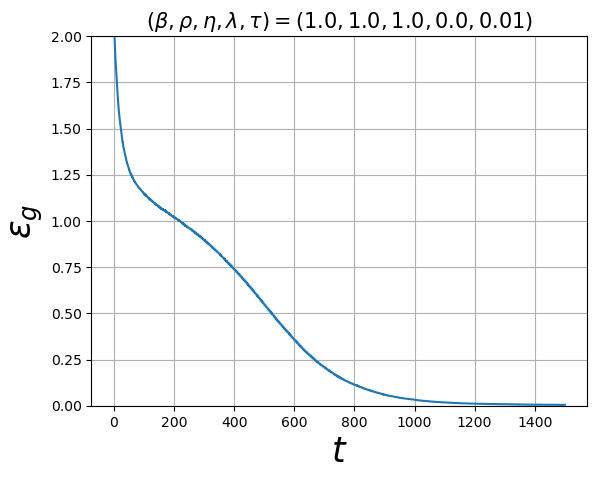

In [4]:
time = np.array([epoch/x_dim for epoch in range(0, num_epoch+1)])
egs_np = np.array(history_seed["egs"])

fig, ax = plt.subplots(figsize=(6.4, 4.8))
ax.plot(time, egs_np.mean(axis=0), ls="-")
ax.fill_between(time, egs_np.mean(axis=0)+egs_np.std(axis=0), 
                egs_np.mean(axis=0)-egs_np.std(axis=0), alpha=0.15)
ax.set_ylim([0, 2])
ax.set_xlabel(r"$t$", fontsize=25)
ax.set_ylabel(r"$\varepsilon_{g}$", fontsize=25)
ax.set_title(r"$(\beta, \rho, \eta, \lambda, \tau)=(1.0, 1.0, 1.0, 0.0, 0.01)$", fontsize=15)
ax.grid()
plt.show()